In [67]:
# Importing required libraries

import pandas as pd
import numpy as np

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [68]:
# Connect to the dataset and import to jupyter file
df= pd.read_csv('https://raw.githubusercontent.com/mohittomar2008/HOUSING-PRICE-PREDICTION/main/train.csv')

In [69]:
# Top 5 records
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [70]:
# Last 5 records
df.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,BrkFace,31.0,TA,Gd,CBlock,TA,TA,No,BLQ,450,Unf,0,432,882,GasA,TA,Y,SBrkr,900,0,0,900,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1970.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,4,5,1949,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1126,0,0,1126,0,0,2,0,2,1,Gd,5,Typ,0,NaN,Detchd,2002.0,Fin,2,520,TA,TA,N,0,96,0,0,0,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,6,1976,1976,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,566,Unf,0,289,855,GasA,TA,Y,SBrkr,855,601,0,1456,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1976.0,Unf,2,440,TA,TA,Y,87,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,GasA,TA,N,SBrkr,649,668,0,1317,0,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1920.0,Unf,1,250,TA,Fa,N,0,54,172,0,0,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
1167,617,60,RL,NaN,7861,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,457,Unf,0,326,783,GasA,Ex,Y,SBrkr,807,702,0,1509,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,Fin,2,393,TA,TA,Y,100,75,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,183200


In [71]:
print( 'Dataset have \n',df.shape[0] ,'Rows','\n and\n',df.shape[1],' Columns')

Dataset have 
 1168 Rows 
 and
 81  Columns


In [72]:
# Our dataset have 1168 rows and 81 features

# Missing Values

In [73]:
pd.set_option('display.max_rows',None)
(df.isnull().sum()/df.shape[0])*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      18.321918
LotArea           0.000000
Street            0.000000
Alley            93.407534
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.599315
MasVnrArea        0.599315
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.568493
BsmtCond          2.568493
BsmtExposure      2.654110
BsmtFinType1      2.568493
BsmtFinSF1        0.000000
BsmtFinType2      2.654110
BsmtFinSF2        0.000000
B

<AxesSubplot:>

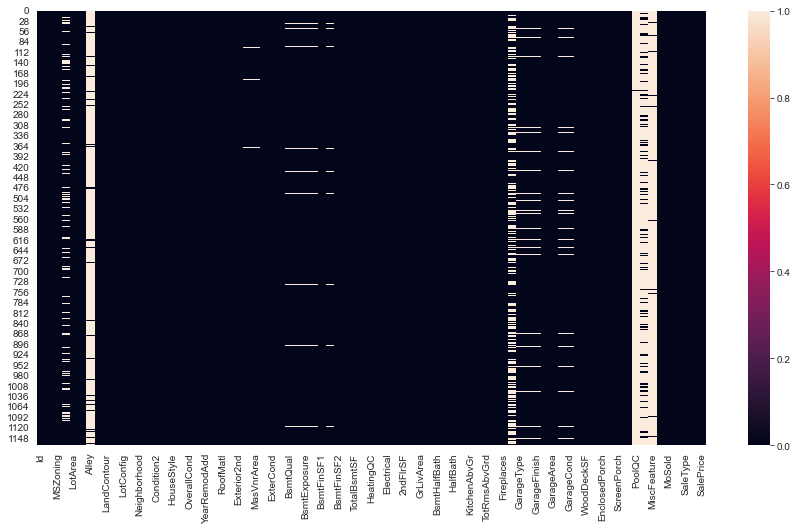

In [74]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull())

In [75]:
# Few features have more than 90% records missing. It would not be good to fill them, better to delete them as they will not provide
# any useful insight for the prediction

In [76]:
# Delete features which have more missing values

df=df.drop(['Alley','PoolQC','Fence','MiscFeature'], axis=1)

In [77]:
df.shape

(1168, 77)

In [78]:
pd.set_option('display.max_rows',None)
(df.isnull().sum()/df.shape[0])*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      18.321918
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.599315
MasVnrArea        0.599315
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.568493
BsmtCond          2.568493
BsmtExposure      2.654110
BsmtFinType1      2.568493
BsmtFinSF1        0.000000
BsmtFinType2      2.654110
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

In [79]:

pd.set_option('display.max_columns',None)
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,0,6,2009,WD,Normal,215000


In [80]:
# Find unique values in each feature

for i in df.columns:
    print(df[i].nunique(), i)

1168 Id
15 MSSubClass
5 MSZoning
106 LotFrontage
892 LotArea
2 Street
4 LotShape
4 LandContour
1 Utilities
5 LotConfig
3 LandSlope
25 Neighborhood
9 Condition1
8 Condition2
5 BldgType
8 HouseStyle
10 OverallQual
9 OverallCond
110 YearBuilt
61 YearRemodAdd
6 RoofStyle
8 RoofMatl
14 Exterior1st
15 Exterior2nd
4 MasVnrType
283 MasVnrArea
4 ExterQual
5 ExterCond
6 Foundation
4 BsmtQual
4 BsmtCond
4 BsmtExposure
6 BsmtFinType1
551 BsmtFinSF1
6 BsmtFinType2
122 BsmtFinSF2
681 BsmtUnfSF
636 TotalBsmtSF
6 Heating
5 HeatingQC
2 CentralAir
5 Electrical
669 1stFlrSF
351 2ndFlrSF
21 LowQualFinSF
746 GrLivArea
4 BsmtFullBath
3 BsmtHalfBath
4 FullBath
3 HalfBath
8 BedroomAbvGr
4 KitchenAbvGr
4 KitchenQual
12 TotRmsAbvGrd
7 Functional
4 Fireplaces
5 FireplaceQu
6 GarageType
97 GarageYrBlt
3 GarageFinish
5 GarageCars
392 GarageArea
5 GarageQual
5 GarageCond
3 PavedDrive
244 WoodDeckSF
176 OpenPorchSF
106 EnclosedPorch
18 3SsnPorch
65 ScreenPorch
8 PoolArea
20 MiscVal
12 MoSold
5 YrSold
9 SaleType
6 Sa

In [81]:
df['Id'].nunique()

1168

In [82]:
df['Utilities'].unique()

array(['AllPub'], dtype=object)

In [83]:
df=df.drop(['Id','Utilities'], axis=1)

In [84]:
df.shape

(1168, 75)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    954 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   LotConfig      1168 non-null   object 
 8   LandSlope      1168 non-null   object 
 9   Neighborhood   1168 non-null   object 
 10  Condition1     1168 non-null   object 
 11  Condition2     1168 non-null   object 
 12  BldgType       1168 non-null   object 
 13  HouseStyle     1168 non-null   object 
 14  OverallQual    1168 non-null   int64  
 15  OverallCond    1168 non-null   int64  
 16  YearBuilt      1168 non-null   int64  
 17  YearRemodAdd   1168 non-null   int64  
 18  RoofStyl

In [86]:
# we have int, object (categorical) and float type datatypes features 

In [87]:
# Statistical Summary

df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1168.0,56.767979,41.940650,20.0,20.00,50.0,70.0,190.0
LotFrontage,954.0,70.988470,24.828750,21.0,60.00,70.0,80.0,313.0
LotArea,1168.0,10484.749144,8957.442311,1300.0,7621.50,9522.5,11515.5,164660.0
OverallQual,1168.0,6.104452,1.390153,1.0,5.00,6.0,7.0,10.0
OverallCond,1168.0,5.595890,1.124343,1.0,5.00,5.0,6.0,9.0
YearBuilt,1168.0,1970.930651,30.145255,1875.0,1954.00,1972.0,2000.0,2010.0
YearRemodAdd,1168.0,1984.758562,20.785185,1950.0,1966.00,1993.0,2004.0,2010.0
MasVnrArea,1161.0,102.310078,182.595606,0.0,0.00,0.0,160.0,1600.0
BsmtFinSF1,1168.0,444.726027,462.664785,0.0,0.00,385.5,714.5,5644.0
BsmtFinSF2,1168.0,46.647260,163.520016,0.0,0.00,0.0,0.0,1474.0


In [88]:
# many features are in integer datatype but having categorical information



In [89]:
df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,NaN,4928,Pave,IR1,Lvl,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,0,2,2007,WD,Normal,128000
1,20,RL,95.0,15865,Pave,IR1,Lvl,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,0,10,2007,WD,Normal,268000
2,60,RL,92.0,9920,Pave,IR1,Lvl,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,0,6,2007,WD,Normal,269790
3,20,RL,105.0,11751,Pave,IR1,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,0,1,2010,COD,Normal,190000
4,20,RL,NaN,16635,Pave,IR1,Lvl,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,0,6,2009,WD,Normal,215000


# Visualization

# Target feature

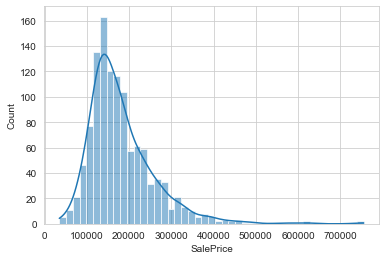

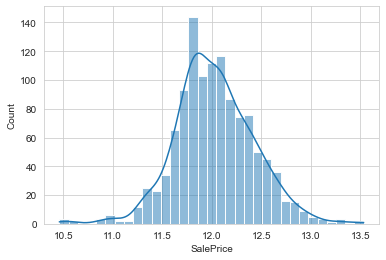

In [90]:
sns.set_style('whitegrid')

sns.histplot(df['SalePrice'], kde=True)
plt.show()


sns.histplot(np.log(df['SalePrice']), kde=True)
plt.show()

<AxesSubplot:>

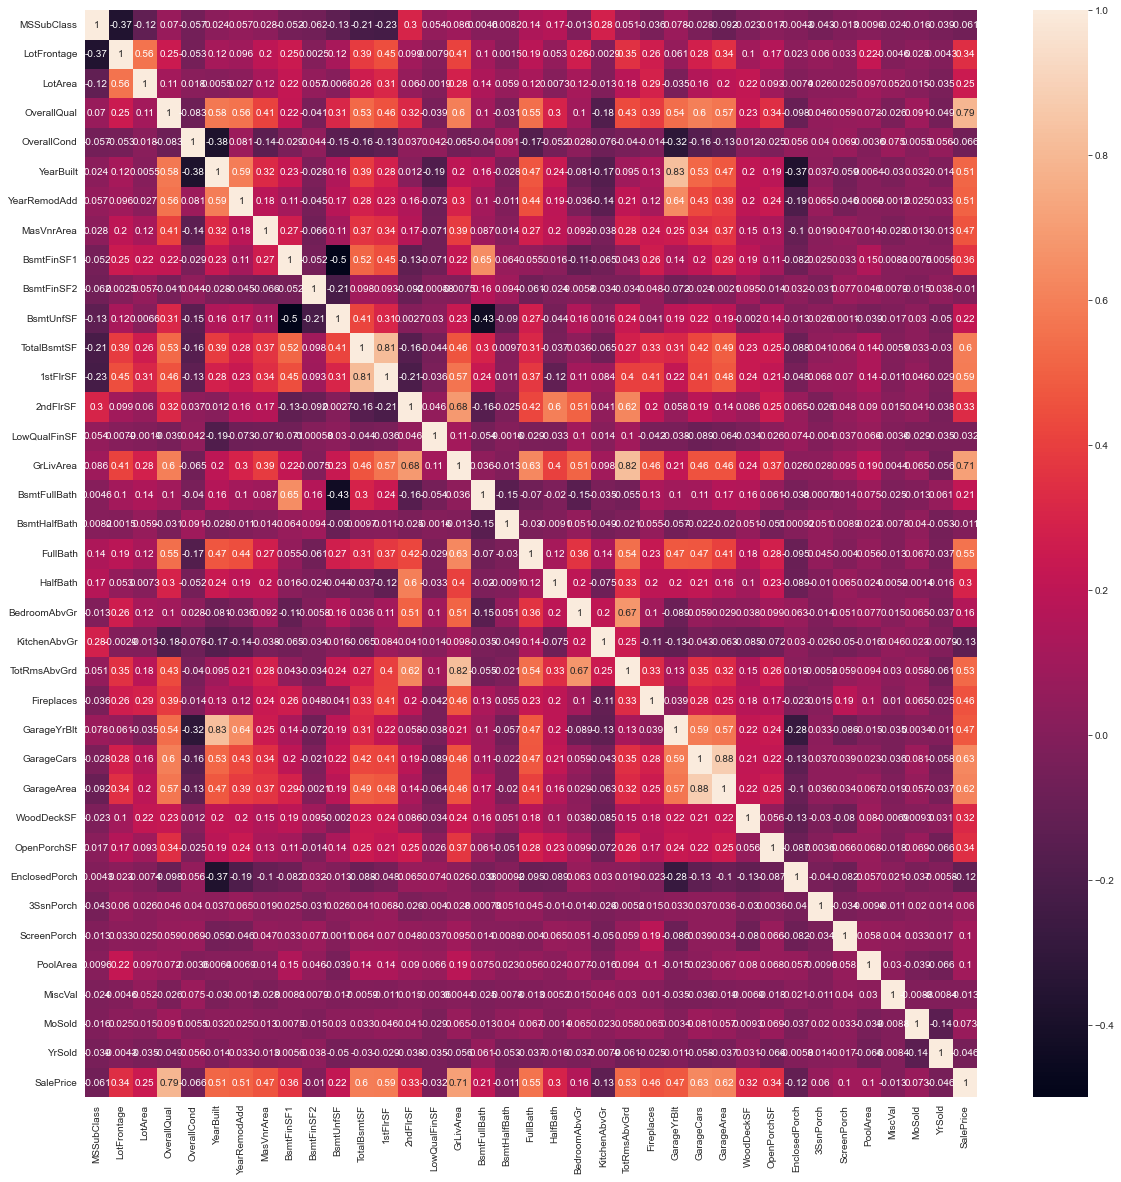

In [91]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

In [92]:
# few features are strongly correlated with target feature
# Although, few independent features are good correlated with each other

In [93]:
df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,NaN,4928,Pave,IR1,Lvl,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,0,2,2007,WD,Normal,128000
1,20,RL,95.0,15865,Pave,IR1,Lvl,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,0,10,2007,WD,Normal,268000


In [94]:
df['MSSubClass'].isnull().sum()

0

In [95]:
df['MSSubClass'].nunique()

15

<AxesSubplot:xlabel='MSSubClass', ylabel='count'>

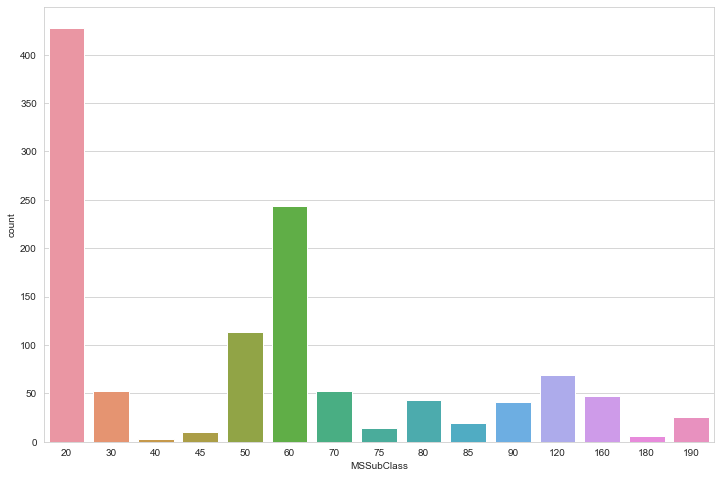

In [96]:
plt.figure(figsize=(12,8))
sns.countplot(df['MSSubClass'])

In [97]:
df['MSSubClass']=df['MSSubClass'].astype('category')

# MSZoning

In [98]:
df['MSZoning'].isnull().sum()

0

In [99]:
df['MSZoning'].unique()

array(['RL', 'RM', 'FV', 'RH', 'C (all)'], dtype=object)

In [100]:
# this is categorical feature, nominal

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

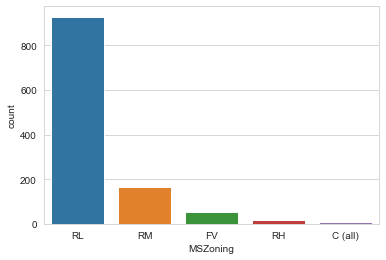

In [101]:
sns.countplot(df['MSZoning'])

In [102]:
# Residential Low Density Zone house more in this dataset.

In [103]:
df.groupby('MSZoning')['SalePrice'].mean().sort_values(ascending=False)

MSZoning
FV         209478.461538
RL         191004.181034
RH         131558.375000
RM         129070.975460
C (all)     75208.888889
Name: SalePrice, dtype: float64

# LotFrontage

In [104]:
def feature_details(i):
    print(i,' has total unique values = ',df[i].nunique() ,'out of ',df.shape[0])
    if df[i].nunique() <10:
        print(df[i].unique())
    print('Feature datatype is = ',df[i].dtypes)
    print('Feature has ',(df[i].isnull().sum()/df.shape[0])*100,'%  missing values')
    
    if df[i].dtypes =='O':
        sns.countplot(df[i])
        plt.show()
        print(df.groupby(i)['SalePrice'].mean().sort_values(ascending=False))
    elif df[i].dtypes !='O':
        sns.scatterplot(df[i],df['SalePrice'])
        plt.show()
        
    

LotFrontage  has total unique values =  106 out of  1168
Feature datatype is =  float64
Feature has  18.32191780821918 %  missing values


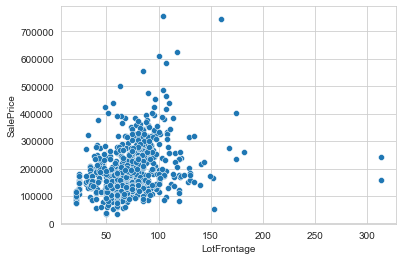

In [105]:
feature_details('LotFrontage')

In [106]:
df['LotFrontage'].isnull().sum()/df.shape[0]

0.1832191780821918

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

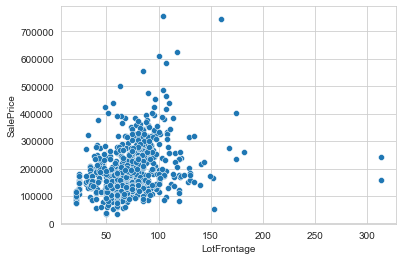

In [107]:
sns.scatterplot(df['LotFrontage'],df['SalePrice'])

LotFrontage have a linear positive relationship with SalePrice

# LotArea

LotArea  has total unique values =  892 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


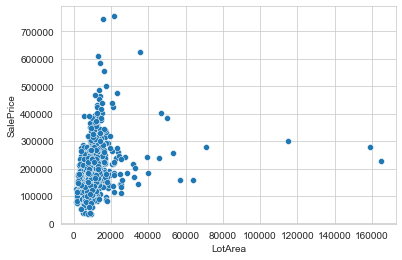

In [108]:
feature_details('LotArea')

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

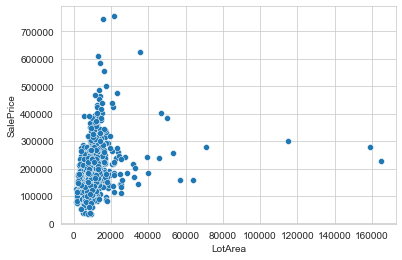

In [109]:
sns.scatterplot(df['LotArea'],df['SalePrice'])

LotArea have a kind of positive liner relationship with SalePrice with some outliers.

LotArea increases, Sale Price increases rapidly

## Street

Street  has total unique values =  2 out of  1168
['Pave' 'Grvl']
Feature datatype is =  object
Feature has  0.0 %  missing values


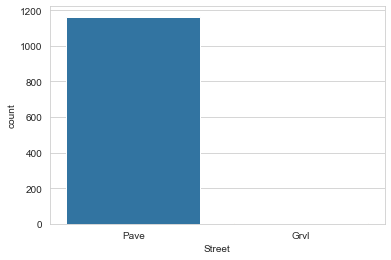

Street
Pave    181684.450172
Grvl    121110.750000
Name: SalePrice, dtype: float64


In [110]:
feature_details('Street')

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved

In [111]:
df['Street'].value_counts()

Pave    1164
Grvl       4
Name: Street, dtype: int64

# LotShape

LotShape  has total unique values =  4 out of  1168
['IR1' 'Reg' 'IR2' 'IR3']
Feature datatype is =  object
Feature has  0.0 %  missing values


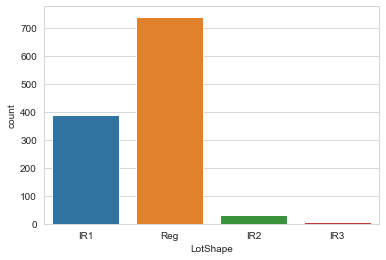

LotShape
IR2    233827.750000
IR3    226120.833333
IR1    206038.464103
Reg    165906.660811
Name: SalePrice, dtype: float64


In [112]:
feature_details('LotShape')

LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

# LandContour

LandContour  has total unique values =  4 out of  1168
['Lvl' 'Bnk' 'HLS' 'Low']
Feature datatype is =  object
Feature has  0.0 %  missing values


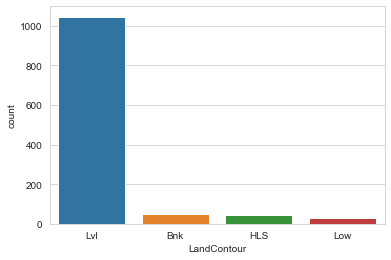

LandContour
HLS    214302.166667
Low    194393.333333
Lvl    181476.572658
Bnk    146163.140000
Name: SalePrice, dtype: float64


In [113]:
feature_details('LandContour')

LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

In [114]:
df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,NaN,4928,Pave,IR1,Lvl,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,0,2,2007,WD,Normal,128000
1,20,RL,95.0,15865,Pave,IR1,Lvl,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,0,10,2007,WD,Normal,268000


LotConfig  has total unique values =  5 out of  1168
['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']
Feature datatype is =  object
Feature has  0.0 %  missing values


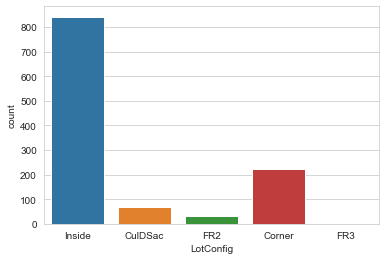

LotConfig
CulDSac    224594.463768
FR3        221500.000000
Corner     182427.635135
Inside     178003.105701
FR2        171138.636364
Name: SalePrice, dtype: float64


In [115]:
feature_details('LotConfig')

LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

# LandSlope

LandSlope  has total unique values =  3 out of  1168
['Gtl' 'Mod' 'Sev']
Feature datatype is =  object
Feature has  0.0 %  missing values


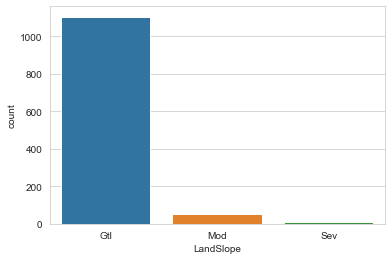

LandSlope
Sev    190160.833333
Mod    185353.313725
Gtl    181203.795475
Name: SalePrice, dtype: float64


In [116]:
feature_details('LandSlope')

LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

# Neighborhood

Neighborhood  has total unique values =  25 out of  1168
Feature datatype is =  object
Feature has  0.0 %  missing values


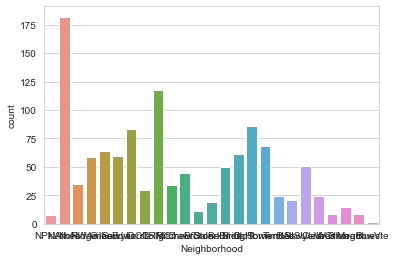

Neighborhood
NoRidge    341260.228571
NridgHt    312548.655738
StoneBr    301145.736842
Veenker    246833.333333
Timber     240579.291667
Somerst    222649.588235
ClearCr    216120.833333
Crawfor    208474.688889
CollgCr    199517.508475
Blmngtn    195987.000000
Gilbert    194790.093750
NWAmes     191643.305085
SawyerW    186909.647059
Mitchel    154654.411765
NAmes      146511.225275
SWISU      142587.333333
NPkVill    141968.750000
Blueste    137500.000000
Sawyer     135029.866667
OldTown    133947.197674
Edwards    128544.216867
BrkSide    122836.000000
BrDale     104081.818182
IDOTRR     101322.666667
MeadowV     88444.444444
Name: SalePrice, dtype: float64


In [117]:
feature_details('Neighborhood')

Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

# Condition1

Condition1  has total unique values =  9 out of  1168
['Norm' 'Feedr' 'RRAn' 'PosA' 'RRAe' 'Artery' 'PosN' 'RRNe' 'RRNn']
Feature datatype is =  object
Feature has  0.0 %  missing values


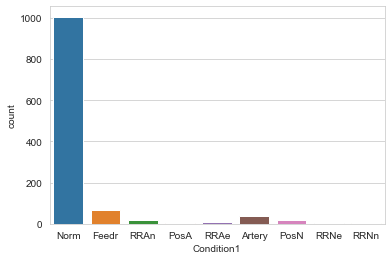

Condition1
RRNn      238000.000000
PosA      237833.333333
PosN      219264.705882
RRNe      190750.000000
RRAn      190074.850000
Norm      184692.003980
Feedr     142799.731343
RRAe      139044.444444
Artery    137926.315789
Name: SalePrice, dtype: float64


In [118]:
feature_details('Condition1')

Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

In [119]:
df.groupby('Condition1')['SalePrice'].count()

Condition1
Artery      38
Feedr       67
Norm      1005
PosA         6
PosN        17
RRAe         9
RRAn        20
RRNe         2
RRNn         4
Name: SalePrice, dtype: int64

In [120]:
df[df['Condition1']=='RRNn']

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
279,70,RM,60.0,6155,Pave,IR1,Lvl,FR3,Gtl,BrkSide,RRNn,Feedr,1Fam,2Story,6,8,1920,1999,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Fa,Fa,Mn,Unf,0,Unf,0,611,611,GasA,Ex,Y,SBrkr,751,611,0,1362,0,0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1920.0,Fin,2,502,TA,Fa,Y,0,0,84,0,0,0,0,6,2008,WD,Normal,128000
418,20,RL,84.0,11670,Pave,IR1,Lvl,Corner,Gtl,Somerst,RRNn,Norm,1Fam,1Story,9,5,2006,2006,Hip,CompShg,VinylSd,ImStucc,Stone,302.0,Ex,TA,PConc,Ex,Gd,No,Unf,0,Unf,0,1905,1905,GasA,Ex,Y,SBrkr,1905,0,0,1905,0,0,2,0,3,1,Ex,8,Typ,1,Gd,Attchd,2006.0,Fin,3,788,TA,TA,Y,0,191,0,0,0,0,0,3,2007,WD,Normal,320000
463,60,RL,NaN,8755,Pave,IR1,Lvl,FR2,Gtl,Gilbert,RRNn,Norm,1Fam,2Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,298.0,Gd,TA,PConc,Gd,TA,No,ALQ,772,Unf,0,220,992,GasA,Ex,Y,SBrkr,1022,1038,0,2060,1,0,2,1,3,1,Gd,8,Typ,1,TA,BuiltIn,1999.0,RFn,2,390,TA,TA,Y,0,0,0,168,0,0,0,6,2009,WD,Normal,214000
493,20,RL,85.0,10182,Pave,IR1,Lvl,CulDSac,Gtl,Somerst,RRNn,Norm,1Fam,1Story,8,5,2006,2006,Hip,CompShg,VinylSd,VinylSd,Stone,420.0,Gd,TA,PConc,Ex,TA,Mn,GLQ,1220,Unf,0,440,1660,GasA,Ex,Y,SBrkr,1660,0,0,1660,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2006.0,RFn,2,500,TA,TA,Y,322,50,0,0,0,0,0,5,2006,New,Partial,290000


## Condition2

Condition2  has total unique values =  8 out of  1168
['Norm' 'RRAe' 'Feedr' 'PosN' 'Artery' 'RRNn' 'PosA' 'RRAn']
Feature datatype is =  object
Feature has  0.0 %  missing values


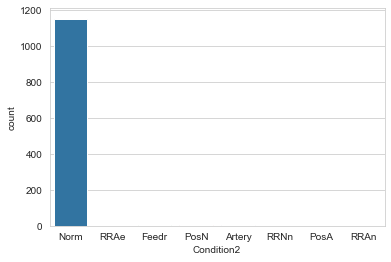

Condition2
PosA      325000.000000
PosN      284875.000000
RRAe      190000.000000
Norm      181697.129983
RRAn      136905.000000
RRNn      125000.000000
Feedr     121166.666667
Artery    106500.000000
Name: SalePrice, dtype: float64


In [121]:
feature_details('Condition2')

In [122]:
df['Condition2'].value_counts()

Norm      1154
Feedr        6
PosN         2
Artery       2
RRAe         1
RRNn         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64

Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

## BldgType

BldgType  has total unique values =  5 out of  1168
['TwnhsE' '1Fam' 'Duplex' 'Twnhs' '2fmCon']
Feature datatype is =  object
Feature has  0.0 %  missing values


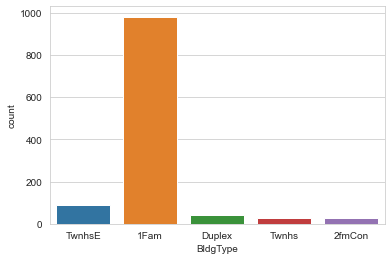

BldgType
TwnhsE    186066.111111
1Fam      185602.300714
Twnhs     139437.931034
Duplex    133871.609756
2fmCon    133737.037037
Name: SalePrice, dtype: float64


In [123]:
feature_details('BldgType')

BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

## HouseStyle

HouseStyle  has total unique values =  8 out of  1168
['1Story' '2Story' '1.5Fin' 'SFoyer' '1.5Unf' 'SLvl' '2.5Fin' '2.5Unf']
Feature datatype is =  object
Feature has  0.0 %  missing values


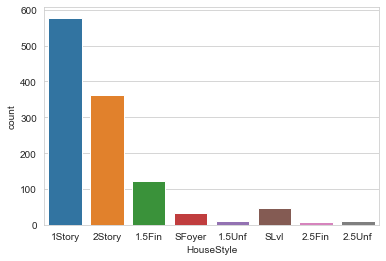

HouseStyle
2.5Fin    223285.714286
2Story    212193.515235
1Story    175940.826990
SLvl      170140.851064
2.5Unf    158690.000000
1.5Fin    138546.363636
SFoyer    137508.000000
1.5Unf    113216.666667
Name: SalePrice, dtype: float64


In [124]:
feature_details('HouseStyle')

HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

## OverallQual

OverallQual  has total unique values =  10 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


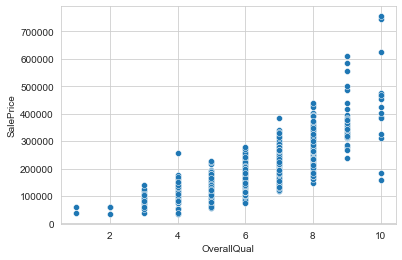

In [125]:
feature_details('OverallQual')

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

## OverallCond

OverallCond  has total unique values =  9 out of  1168
[5 6 7 4 8 2 3 9 1]
Feature datatype is =  int64
Feature has  0.0 %  missing values


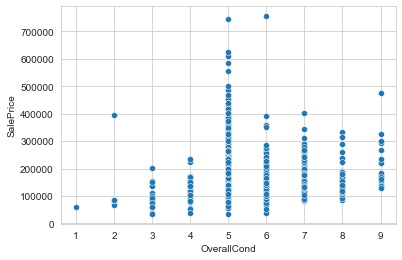

In [126]:
feature_details('OverallCond')

In [127]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchS

# YearBuilt

YearBuilt  has total unique values =  110 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


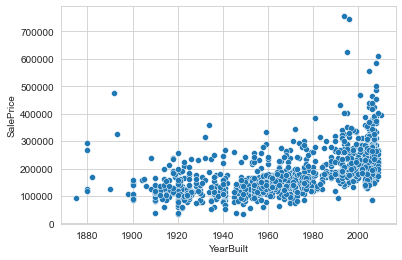

In [128]:
feature_details('YearBuilt')

Year Built have direct positive relationship with  SalePrice

New build house have more price

we can do feature extraction on this feature to get house total age

# YearRemodAdd

YearRemodAdd  has total unique values =  61 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


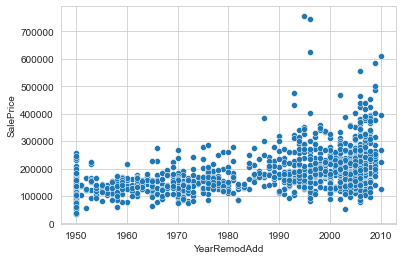

In [129]:
feature_details('YearRemodAdd')

## RoofStyle

RoofStyle  has total unique values =  6 out of  1168
['Gable' 'Flat' 'Hip' 'Shed' 'Gambrel' 'Mansard']
Feature datatype is =  object
Feature has  0.0 %  missing values


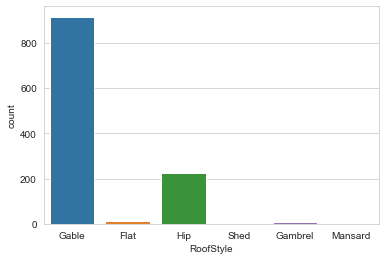

RoofStyle
Shed       225000.000000
Hip        214493.364444
Flat       204080.833333
Mansard    194795.800000
Gable      173251.570492
Gambrel    145111.111111
Name: SalePrice, dtype: float64


In [132]:
feature_details('RoofStyle')

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

In [133]:
df['RoofStyle'].value_counts()

Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64

In [135]:
df[df['RoofStyle']=='Shed']

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
32,90,RL,NaN,18890,Pave,IR1,Lvl,Inside,Gtl,Sawyer,Feedr,RRAe,Duplex,1.5Fin,5,5,1977,1977,Shed,CompShg,Plywood,Plywood,None,1.0,TA,TA,CBlock,Gd,TA,No,GLQ,498,Rec,211,652,1361,GasA,Ex,Y,SBrkr,1361,1259,0,2620,0,0,2,2,4,2,TA,12,Typ,1,TA,BuiltIn,1977.0,RFn,2,600,TA,TA,N,155,24,145,0,0,0,8300,8,2007,WD,Normal,190000
211,40,RL,NaN,23595,Pave,Reg,Low,Inside,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,6,1979,1979,Shed,WdShake,Plywood,Plywood,None,0.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1258,Unf,0,74,1332,GasA,TA,Y,SBrkr,1332,192,0,1524,2,0,0,1,0,1,Gd,4,Typ,1,TA,Attchd,1979.0,Fin,2,586,TA,TA,Y,268,0,0,0,0,0,0,4,2010,WD,Normal,260000


# RoofMatl

RoofMatl  has total unique values =  8 out of  1168
['CompShg' 'Tar&Grv' 'WdShngl' 'WdShake' 'Roll' 'ClyTile' 'Metal'
 'Membran']
Feature datatype is =  object
Feature has  0.0 %  missing values


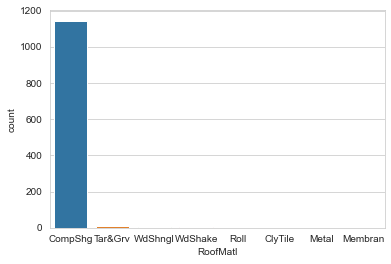

RoofMatl
WdShngl    390250.000000
WdShake    254250.000000
Membran    241500.000000
Tar&Grv    195747.000000
CompShg    180009.329545
Metal      180000.000000
ClyTile    160000.000000
Roll       137000.000000
Name: SalePrice, dtype: float64


In [136]:
feature_details('RoofMatl')

RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

# Exterior1st

Exterior1st  has total unique values =  14 out of  1168
Feature datatype is =  object
Feature has  0.0 %  missing values


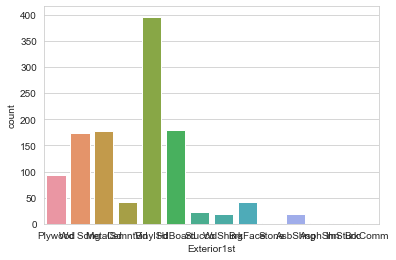

Exterior1st
ImStucc    262000.000000
Stone      258500.000000
CemntBd    242928.476190
VinylSd    215359.676768
BrkFace    198391.463415
Plywood    178890.075269
HdBoard    163432.648045
Stucco     160602.272727
WdShing    155481.578947
Wd Sdng    152572.724138
MetalSd    148498.196629
AsbShng    107774.263158
AsphShn    100000.000000
BrkComm     60000.000000
Name: SalePrice, dtype: float64


In [137]:
feature_details('Exterior1st')

Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

# Exterior2nd

Exterior2nd  has total unique values =  15 out of  1168
Feature datatype is =  object
Feature has  0.0 %  missing values


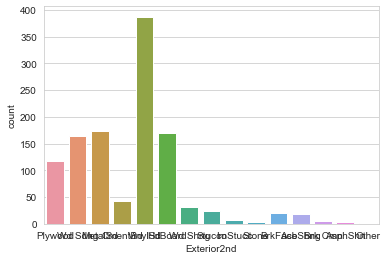

Exterior2nd
Other      319000.000000
ImStucc    273712.500000
CmentBd    247940.380952
VinylSd    215607.100775
BrkFace    194772.500000
Stone      174406.000000
Plywood    169979.042373
HdBoard    168398.200000
Wd Shng    156650.000000
Stucco     153066.695652
Wd Sdng    152218.969697
MetalSd    148570.398844
AsphShn    138000.000000
Brk Cmn    131300.000000
AsbShng    114372.833333
Name: SalePrice, dtype: float64


In [138]:
feature_details('Exterior2nd')

# MasVnrType

MasVnrType  has total unique values =  4 out of  1168
['None' 'BrkFace' 'Stone' 'BrkCmn' nan]
Feature datatype is =  object
Feature has  0.5993150684931506 %  missing values


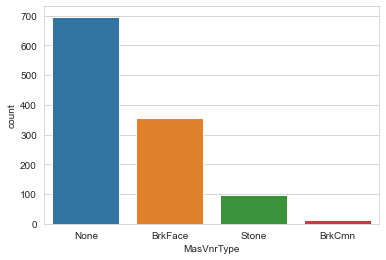

MasVnrType
Stone      261417.867347
BrkFace    205275.432203
None       158226.787356
BrkCmn     141990.076923
Name: SalePrice, dtype: float64


In [139]:
feature_details('MasVnrType')

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

# MasVnrArea

MasVnrArea  has total unique values =  283 out of  1168
Feature datatype is =  float64
Feature has  0.5993150684931506 %  missing values


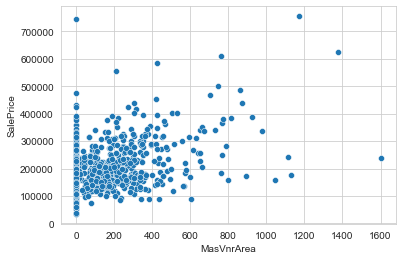

In [140]:
feature_details('MasVnrArea')

	
MasVnrArea: Masonry veneer area in square feet

# ExterQual

ExterQual  has total unique values =  4 out of  1168
['TA' 'Gd' 'Ex' 'Fa']
Feature datatype is =  object
Feature has  0.0 %  missing values


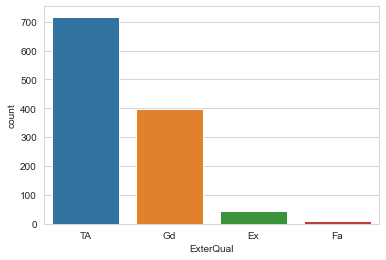

ExterQual
Ex    357817.651163
Gd    231009.743073
TA    144918.163180
Fa     87435.727273
Name: SalePrice, dtype: float64


In [141]:
feature_details('ExterQual')

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

# ExterCond

ExterCond  has total unique values =  5 out of  1168
['TA' 'Gd' 'Fa' 'Po' 'Ex']
Feature datatype is =  object
Feature has  0.0 %  missing values


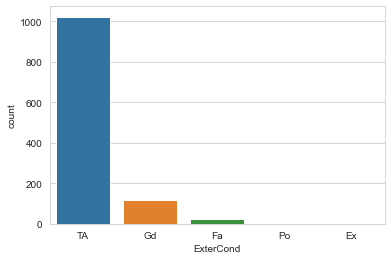

ExterCond
Ex    243000.000000
TA    184551.990215
Gd    171391.837607
Fa    105294.769231
Po     76500.000000
Name: SalePrice, dtype: float64


In [143]:
feature_details('ExterCond')

ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

## Foundation

Foundation  has total unique values =  6 out of  1168
['CBlock' 'PConc' 'BrkTil' 'Slab' 'Stone' 'Wood']
Feature datatype is =  object
Feature has  0.0 %  missing values


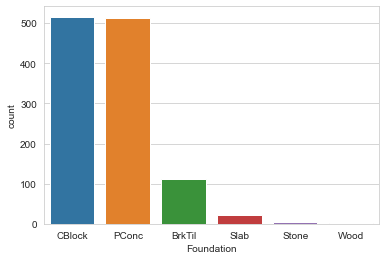

Foundation
PConc     225757.504873
Stone     177651.000000
Wood      164000.000000
CBlock    149858.994186
BrkTil    137895.285714
Slab      110846.428571
Name: SalePrice, dtype: float64


In [145]:
feature_details('Foundation')

Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

# Basement 

# BsmtQual

BsmtQual  has total unique values =  4 out of  1168
['Gd' 'TA' 'Ex' nan 'Fa']
Feature datatype is =  object
Feature has  2.5684931506849313 %  missing values


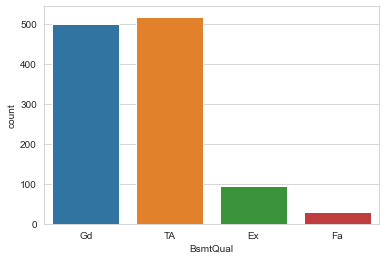

BsmtQual
Ex    331469.978723
Gd    203225.445783
TA    140898.736944
Fa    121349.000000
Name: SalePrice, dtype: float64


In [146]:
feature_details('BsmtQual')

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

# BsmtCond

BsmtCond  has total unique values =  4 out of  1168
['TA' 'Gd' 'Fa' nan 'Po']
Feature datatype is =  object
Feature has  2.5684931506849313 %  missing values


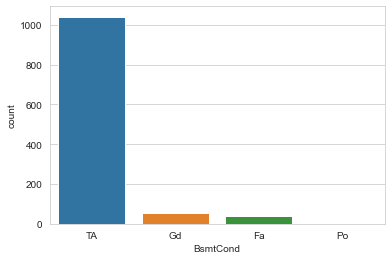

BsmtCond
Gd    219908.107143
TA    184018.669549
Fa    121075.102564
Po     64000.000000
Name: SalePrice, dtype: float64


In [147]:
feature_details('BsmtCond')

BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

# BsmtExposure

BsmtExposure  has total unique values =  4 out of  1168
['No' 'Gd' 'Av' 'Mn' nan]
Feature datatype is =  object
Feature has  2.654109589041096 %  missing values


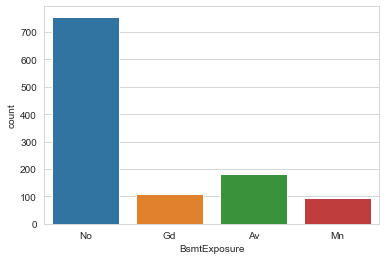

BsmtExposure
Gd    250581.138889
Av    204174.861111
Mn    194213.838710
No    167539.144180
Name: SalePrice, dtype: float64


In [148]:
feature_details('BsmtExposure')

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

## BsmtFinType1

BsmtFinType1  has total unique values =  6 out of  1168
['ALQ' 'GLQ' 'BLQ' 'Unf' 'Rec' 'LwQ' nan]
Feature datatype is =  object
Feature has  2.5684931506849313 %  missing values


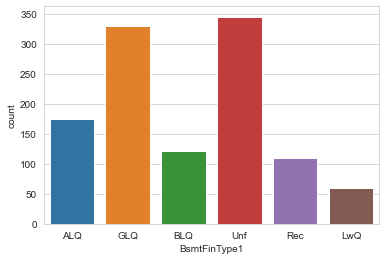

BsmtFinType1
GLQ    236871.596970
Unf    172159.521739
ALQ    161003.879310
BLQ    152803.396694
LwQ    152712.711864
Rec    143592.844037
Name: SalePrice, dtype: float64


In [149]:
feature_details('BsmtFinType1')

BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF1: Type 1 finished square feet

## BsmtFinType2

BsmtFinType2  has total unique values =  6 out of  1168
['Unf' 'Rec' 'BLQ' 'GLQ' nan 'ALQ' 'LwQ']
Feature datatype is =  object
Feature has  2.654109589041096 %  missing values


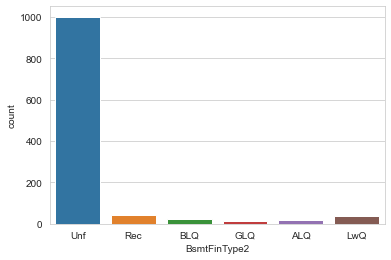

BsmtFinType2
GLQ    194937.500000
ALQ    194712.500000
Unf    185077.455090
LwQ    168846.250000
Rec    164477.325581
BLQ    154815.958333
Name: SalePrice, dtype: float64


In [150]:
feature_details('BsmtFinType2')

# BsmtFinSF2

BsmtFinSF2  has total unique values =  122 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


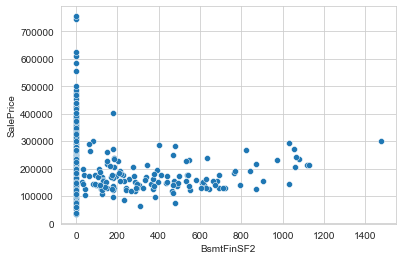

In [151]:
feature_details('BsmtFinSF2')

BsmtFinSF2: Type 2 finished square feet

In [152]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchS

## BsmtUnfSF

BsmtUnfSF  has total unique values =  681 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


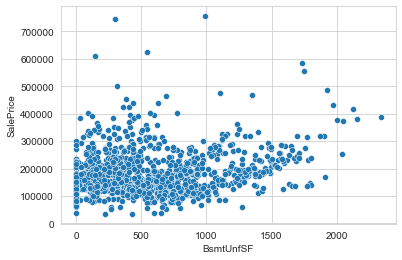

In [153]:
feature_details('BsmtUnfSF')

 this has weak positive correlation with SalePrice

# TotalBsmtSF

TotalBsmtSF  has total unique values =  636 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


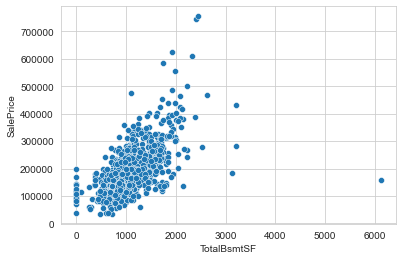

In [154]:
feature_details('TotalBsmtSF')

TotalBsmtSF: Total square feet of basement area

as the total basement area increases, saleprice increases

# Atmosphere

# Heating

Heating  has total unique values =  6 out of  1168
['GasA' 'GasW' 'Floor' 'OthW' 'Wall' 'Grav']
Feature datatype is =  object
Feature has  0.0 %  missing values


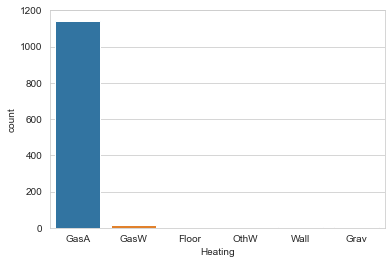

Heating
GasA     182591.394576
GasW     167312.785714
OthW     129500.000000
Wall      92100.000000
Floor     72500.000000
Grav      70080.000000
Name: SalePrice, dtype: float64


In [155]:
feature_details('Heating')

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

## HeatingQC

HeatingQC  has total unique values =  5 out of  1168
['TA' 'Ex' 'Gd' 'Fa' 'Po']
Feature datatype is =  object
Feature has  0.0 %  missing values


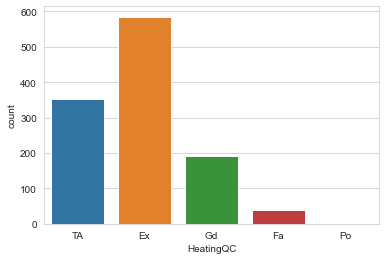

HeatingQC
Ex    215954.223932
Gd    158909.833333
TA    142684.883523
Fa    126556.710526
Po     87000.000000
Name: SalePrice, dtype: float64


In [156]:
feature_details('HeatingQC')

HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

# CentralAir

CentralAir  has total unique values =  2 out of  1168
['Y' 'N']
Feature datatype is =  object
Feature has  0.0 %  missing values


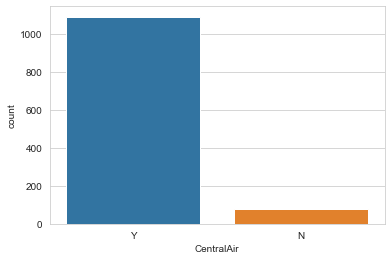

CentralAir
Y    186696.381651
N    108539.576923
Name: SalePrice, dtype: float64


In [157]:
feature_details('CentralAir')

In [159]:
df['CentralAir'].value_counts(normalize=True)

Y    0.933219
N    0.066781
Name: CentralAir, dtype: float64

# Electrical

Electrical  has total unique values =  5 out of  1168
['SBrkr' 'FuseA' 'FuseF' 'FuseP' 'Mix']
Feature datatype is =  object
Feature has  0.0 %  missing values


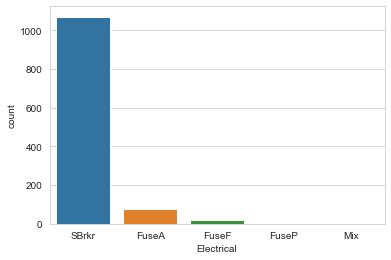

Electrical
SBrkr    187253.339252
FuseA    121840.986486
FuseF    109611.285714
FuseP    109500.000000
Mix       67000.000000
Name: SalePrice, dtype: float64


In [161]:
feature_details('Electrical')

# 1stFlrSF

1stFlrSF  has total unique values =  669 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


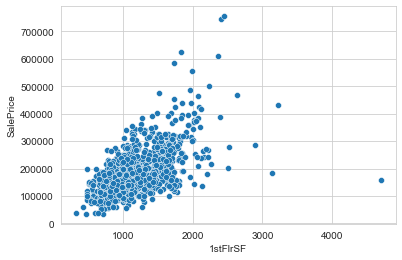

In [160]:
feature_details('1stFlrSF')

# 2ndFlrSF

2ndFlrSF  has total unique values =  351 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


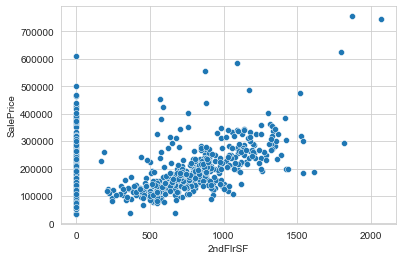

In [162]:
feature_details('2ndFlrSF')

2ndFlrSF: Second floor square feet

## LowQualFinSF

LowQualFinSF  has total unique values =  21 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


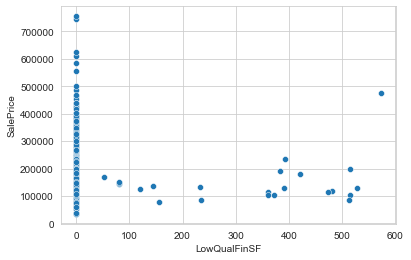

In [164]:
feature_details('LowQualFinSF')

## GrLivArea

GrLivArea  has total unique values =  746 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


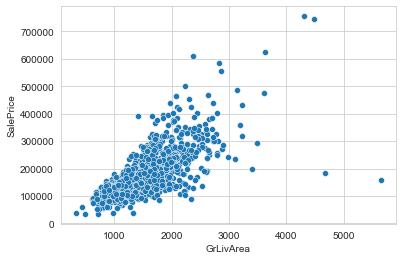

In [165]:
feature_details('GrLivArea')

## BsmtFullBath

BsmtFullBath  has total unique values =  4 out of  1168
[0 1 2 3]
Feature datatype is =  int64
Feature has  0.0 %  missing values


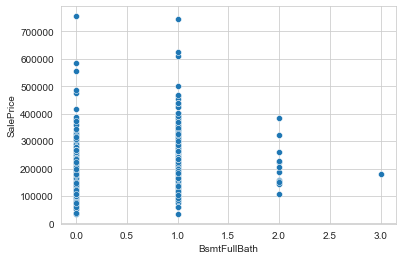

In [166]:
feature_details('BsmtFullBath')

In [167]:
df['BsmtFullBath'].value_counts()

0    686
1    468
2     13
3      1
Name: BsmtFullBath, dtype: int64

# BsmtHalfBath

BsmtHalfBath  has total unique values =  3 out of  1168
[0 1 2]
Feature datatype is =  int64
Feature has  0.0 %  missing values


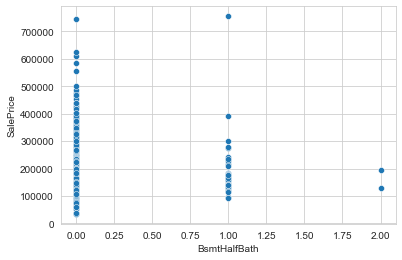

In [168]:
feature_details('BsmtHalfBath')

In [169]:
df['BsmtHalfBath'].value_counts()

0    1105
1      61
2       2
Name: BsmtHalfBath, dtype: int64

## FullBath

FullBath  has total unique values =  4 out of  1168
[2 1 3 0]
Feature datatype is =  int64
Feature has  0.0 %  missing values


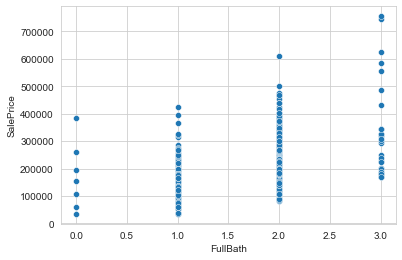

In [170]:
feature_details('FullBath')

In [171]:
df['FullBath'].value_counts()

2    610
1    524
3     27
0      7
Name: FullBath, dtype: int64

## HalfBath

HalfBath  has total unique values =  3 out of  1168
[0 1 2]
Feature datatype is =  int64
Feature has  0.0 %  missing values


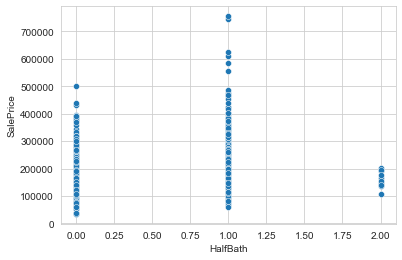

In [172]:
feature_details('HalfBath')

# Bedroom

BedroomAbvGr  has total unique values =  8 out of  1168
[2 4 3 1 5 0 6 8]
Feature datatype is =  int64
Feature has  0.0 %  missing values


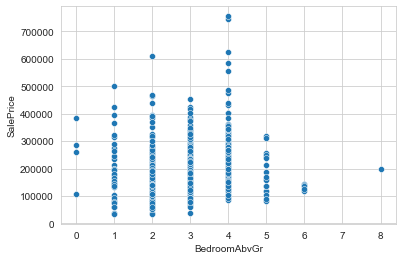

In [174]:
feature_details('BedroomAbvGr')

In [175]:
df['BedroomAbvGr'].value_counts()

3    640
2    281
4    180
1     39
5     18
6      5
0      4
8      1
Name: BedroomAbvGr, dtype: int64

# KitchenAbvGr

KitchenAbvGr  has total unique values =  4 out of  1168
[1 2 3 0]
Feature datatype is =  int64
Feature has  0.0 %  missing values


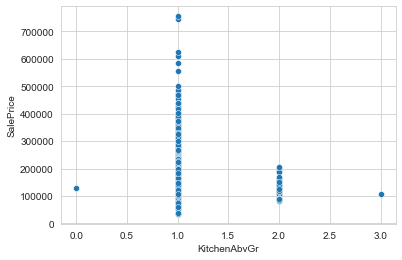

In [176]:
feature_details('KitchenAbvGr')

# KitchenAbvGr

KitchenQual  has total unique values =  4 out of  1168
['TA' 'Gd' 'Ex' 'Fa']
Feature datatype is =  object
Feature has  0.0 %  missing values


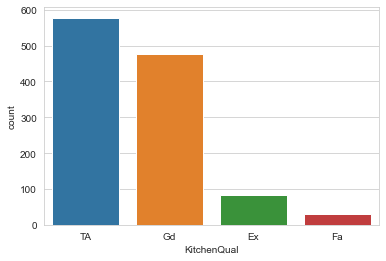

KitchenQual
Ex    327812.329268
Gd    211076.234310
TA    140206.313149
Fa    105028.100000
Name: SalePrice, dtype: float64


In [178]:
feature_details('KitchenQual')

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

In [179]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchS

# TotRmsAbvGrd

TotRmsAbvGrd  has total unique values =  12 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


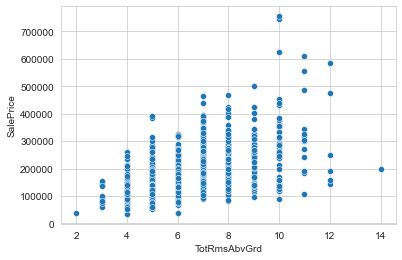

In [180]:
feature_details('TotRmsAbvGrd')

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

# Functional

Functional  has total unique values =  7 out of  1168
['Typ' 'Mod' 'Maj1' 'Min1' 'Min2' 'Sev' 'Maj2']
Feature datatype is =  object
Feature has  0.0 %  missing values


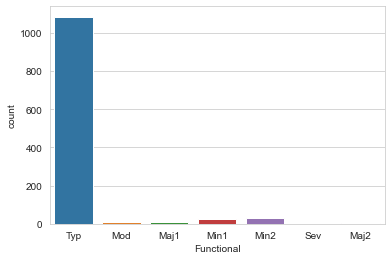

Functional
Typ     184204.948387
Min1    152630.000000
Maj1    151443.090909
Min2    146841.666667
Mod     145241.666667
Sev     129000.000000
Maj2     86000.000000
Name: SalePrice, dtype: float64


In [181]:
feature_details('Functional')

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

# Fireplaces

Fireplaces  has total unique values =  4 out of  1168
[1 0 2 3]
Feature datatype is =  int64
Feature has  0.0 %  missing values


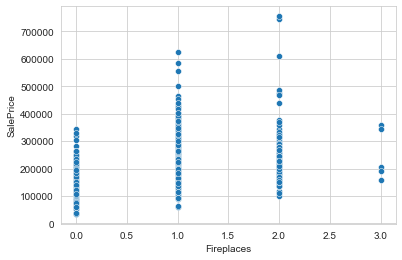

In [182]:
feature_details('Fireplaces')

In [183]:
df['Fireplaces'].value_counts()

0    551
1    518
2     94
3      5
Name: Fireplaces, dtype: int64

Fireplaces: Number of fireplaces

## FireplaceQu

FireplaceQu  has total unique values =  5 out of  1168
['TA' 'Gd' nan 'Fa' 'Ex' 'Po']
Feature datatype is =  object
Feature has  47.17465753424658 %  missing values


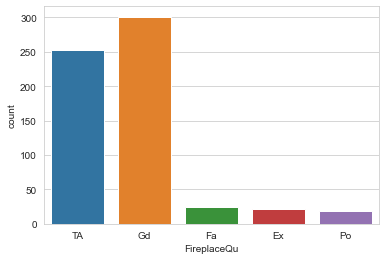

FireplaceQu
Ex    346091.142857
Gd    221925.581395
TA    209946.753968
Fa    166214.000000
Po    131487.944444
Name: SalePrice, dtype: float64


In [184]:
feature_details('FireplaceQu')

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

## GarageType

GarageType  has total unique values =  6 out of  1168
['Attchd' 'BuiltIn' 'Detchd' 'Basment' nan '2Types' 'CarPort']
Feature datatype is =  object
Feature has  5.47945205479452 %  missing values


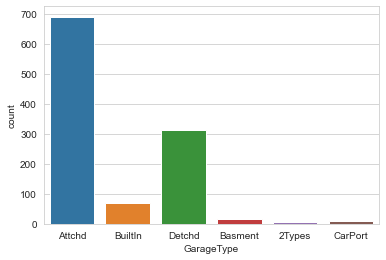

GarageType
BuiltIn    254970.900000
Attchd     203675.839363
Basment    160708.937500
2Types     144200.000000
Detchd     135873.799363
CarPort    109957.375000
Name: SalePrice, dtype: float64


In [185]:
feature_details('GarageType')

GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

## GarageYrBlt

GarageYrBlt  has total unique values =  97 out of  1168
Feature datatype is =  float64
Feature has  5.47945205479452 %  missing values


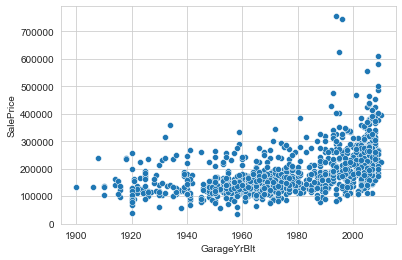

In [187]:
feature_details('GarageYrBlt')

# GarageFinish

GarageFinish  has total unique values =  3 out of  1168
['RFn' 'Unf' 'Fin' nan]
Feature datatype is =  object
Feature has  5.47945205479452 %  missing values


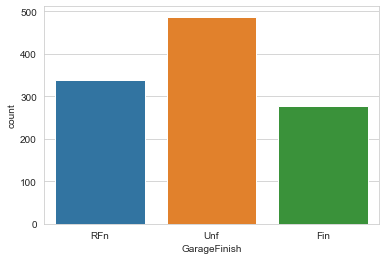

GarageFinish
Fin    241223.809353
RFn    201925.554572
Unf    143555.156057
Name: SalePrice, dtype: float64


In [188]:
feature_details('GarageFinish')

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

## GarageCars

GarageCars  has total unique values =  5 out of  1168
[2 3 1 0 4]
Feature datatype is =  int64
Feature has  0.0 %  missing values


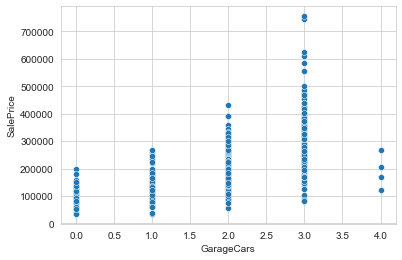

In [189]:
feature_details('GarageCars')

GarageCars: Size of garage in car capacity

## GarageArea

GarageArea  has total unique values =  392 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


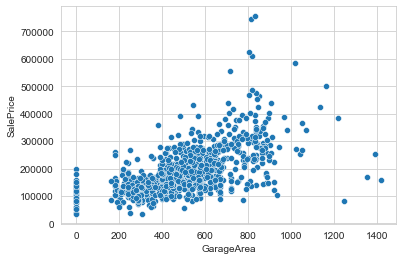

In [190]:
feature_details('GarageArea')

GarageArea: Size of garage in square feet

## GarageQual

GarageQual  has total unique values =  5 out of  1168
['TA' 'Fa' nan 'Gd' 'Ex' 'Po']
Feature datatype is =  object
Feature has  5.47945205479452 %  missing values


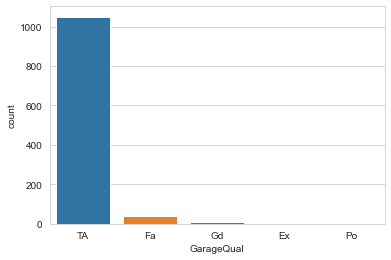

GarageQual
Ex    297750.000000
Gd    219822.727273
TA    187753.449524
Fa    129889.000000
Po    102000.000000
Name: SalePrice, dtype: float64


In [191]:
feature_details('GarageQual')

# GarageCond

GarageCond  has total unique values =  5 out of  1168
['TA' 'Fa' 'Gd' nan 'Po' 'Ex']
Feature datatype is =  object
Feature has  5.47945205479452 %  missing values


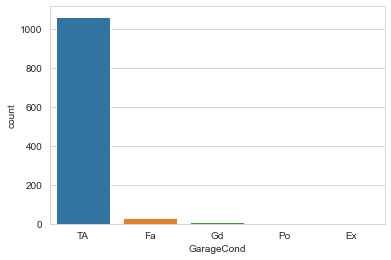

GarageCond
TA    188483.112158
Gd    179921.250000
Ex    120500.000000
Fa    115031.821429
Po    110500.000000
Name: SalePrice, dtype: float64


In [192]:
feature_details('GarageCond')

GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

### PavedDrive

PavedDrive  has total unique values =  3 out of  1168
['Y' 'N' 'P']
Feature datatype is =  object
Feature has  0.0 %  missing values


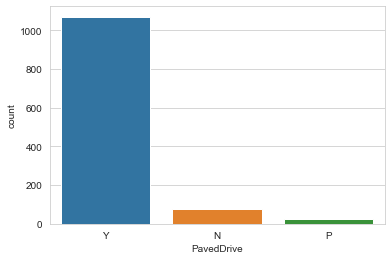

PavedDrive
Y    187006.026144
P    133326.086957
N    116421.472973
Name: SalePrice, dtype: float64


In [193]:
feature_details('PavedDrive')

PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

# WoodDeckSF

WoodDeckSF  has total unique values =  244 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


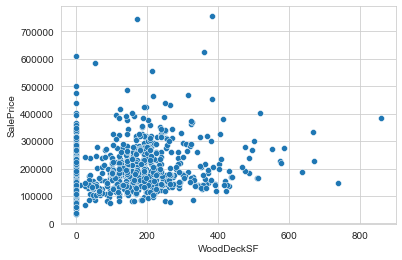

In [194]:
feature_details('WoodDeckSF')

## OpenPorchSF

OpenPorchSF  has total unique values =  176 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


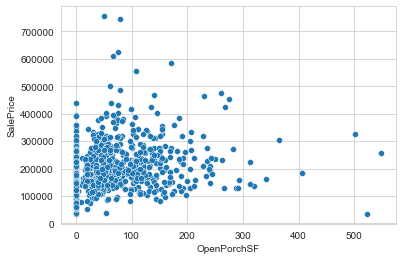

In [195]:
feature_details('OpenPorchSF')

In [196]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchS

# EnclosedPorch

EnclosedPorch  has total unique values =  106 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


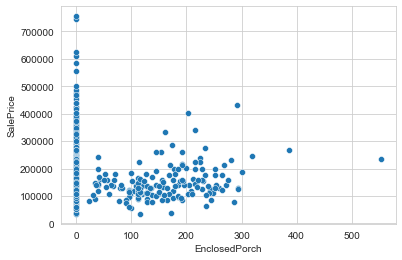

In [197]:
feature_details('EnclosedPorch')

# 3SsnPorch

3SsnPorch  has total unique values =  18 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


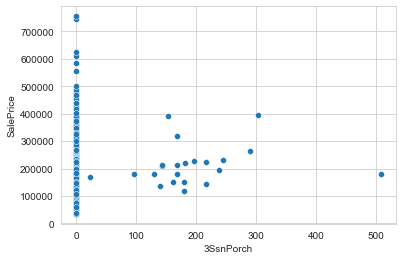

In [198]:
feature_details('3SsnPorch')

3SsnPorch: Three season porch area in square feet

# ScreenPorch

ScreenPorch  has total unique values =  65 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


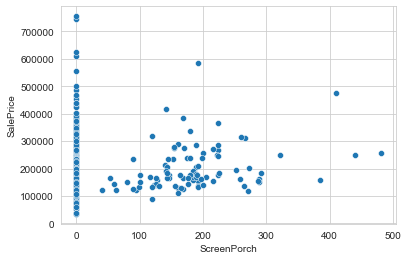

In [199]:
feature_details('ScreenPorch')

# PoolArea

PoolArea  has total unique values =  8 out of  1168
[  0 555 576 738 519 480 648 512]
Feature datatype is =  int64
Feature has  0.0 %  missing values


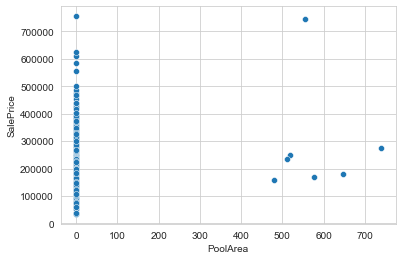

In [200]:
feature_details('PoolArea')

# MiscVal

MiscVal  has total unique values =  20 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


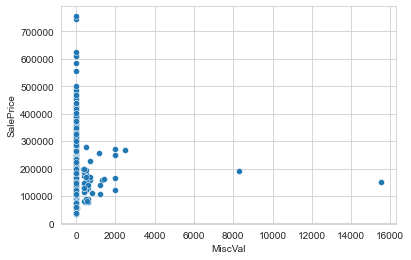

In [201]:
feature_details('MiscVal')

# MoSold

MoSold  has total unique values =  12 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


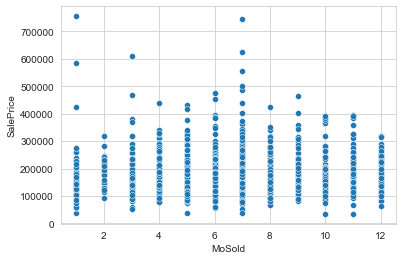

In [202]:
feature_details('MoSold')

# YrSold

YrSold  has total unique values =  5 out of  1168
[2007 2010 2009 2006 2008]
Feature datatype is =  int64
Feature has  0.0 %  missing values


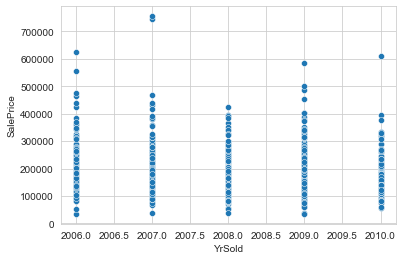

In [203]:
feature_details('YrSold')

In [204]:
df['YrSold'].value_counts()

2007    264
2009    260
2006    254
2008    248
2010    142
Name: YrSold, dtype: int64

# SaleType

SaleType  has total unique values =  9 out of  1168
['WD' 'COD' 'New' 'ConLI' 'ConLw' 'Con' 'ConLD' 'Oth' 'CWD']
Feature datatype is =  object
Feature has  0.0 %  missing values


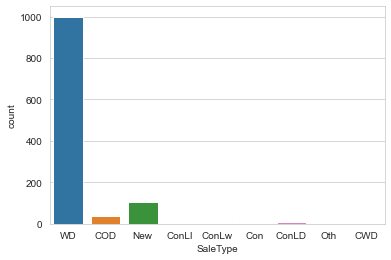

SaleType
New      271104.500000
Con      269600.000000
ConLI    200390.000000
WD       173668.456456
CWD      171166.666667
COD      146722.368421
ConLD    146141.000000
ConLw    143625.000000
Oth      119850.000000
Name: SalePrice, dtype: float64


In [205]:
feature_details('SaleType')

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

# SaleCondition

SaleCondition  has total unique values =  6 out of  1168
['Normal' 'Partial' 'Abnorml' 'Family' 'Alloca' 'AdjLand']
Feature datatype is =  object
Feature has  0.0 %  missing values


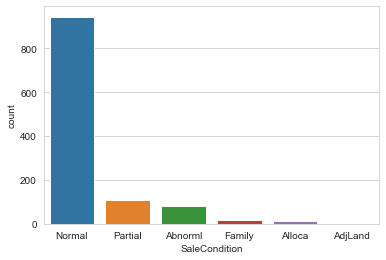

SaleCondition
Partial    269585.231481
Normal     175436.408466
Alloca     167377.416667
Family     149138.888889
Abnorml    147567.938272
AdjLand    104125.000000
Name: SalePrice, dtype: float64


In [206]:
feature_details('SaleCondition')

SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In [207]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchS

In [210]:
continuous= [x for x in df.columns if df[x].dtypes!='O']
categorical= [x for x in df.columns if df[x].dtypes=='O']

In [214]:
len(continuous), len(categorical), df.shape[1]

(37, 38, 75)

In [224]:
df[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,120,0,958,1078
1,351,823,1043,2217
2,862,0,255,1117
3,705,0,1139,1844
4,1246,0,356,1602
5,0,0,879,879
6,1302,0,90,1392
7,168,682,284,1134
8,698,96,420,1214
9,442,0,390,832
